In [31]:
library(ggplot2)

In [35]:
bachelor <- read.csv('data/bachelor_contestants.csv')
bachelorette <- read.csv('data/bachelorette_contestants.csv')
bachelor <- subset(bachelor, select = -index) # delete the index column
bachelorette <- subset(bachelorette, select = -index) # delete the index column

bachelor$show <- 'bachelor'
bachelorette$show <- 'bachelorette'

In [36]:
mean(bachelorette$age)

[1] 29.05058

In [37]:
mean(bachelor$age, na.rm = TRUE)

[1] 26.4511

In [38]:
# bind frames together
all <- rbind(bachelor, bachelorette)

Below is a custom theme template that I will use across all plots to make them a bit more aesthetically pleasing 

In [130]:
library(ggplot2); library(scales); library(grid); library(RColorBrewer)

fte_theme <- function() {
      
# Generate the colors for the chart procedurally with RColorBrewer
palette <- brewer.pal("Greys", n=9)
color.background = palette[2]
color.grid.major = palette[3]
color.axis.text = palette[6]
color.axis.title = palette[7]
color.title = palette[9]
      
# Begin construction of chart
theme_bw(base_size=9) +
        
# Set the entire chart region to a light gray color
theme(panel.background=element_rect(fill=color.background, color=color.background)) +
theme(plot.background=element_rect(fill=color.background, color=color.background)) +
theme(panel.border=element_rect(color=color.background)) +
      
# Format the grid
theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
theme(panel.grid.minor=element_blank()) +
theme(axis.ticks=element_blank()) +
      
# Format the legend, but hide by default
theme(legend.position="none") +
theme(legend.background = element_rect(fill=color.background)) +
theme(legend.text = element_text(size=7,color=color.axis.title)) +
      
# Set title and axis labels, and format these and tick marks
theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
      
# Plot margins
theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

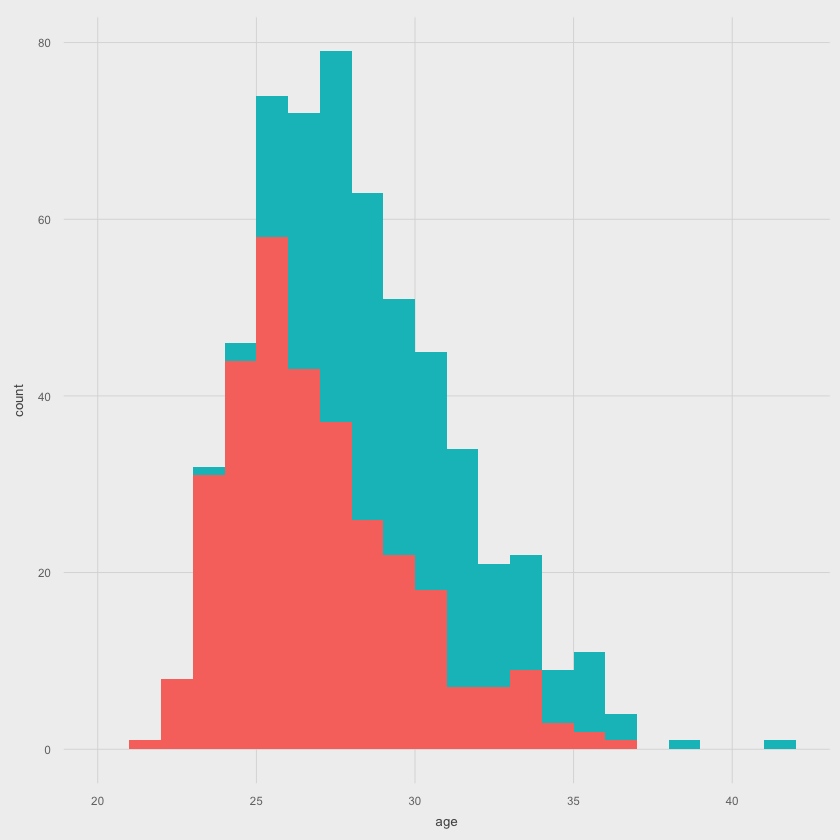

In [131]:
# plot histogram of ages

ggplot(all, aes(age))+geom_histogram(binwidth = 1, aes(fill = factor(show))) + fte_theme()

In [56]:
library(plyr)

# find the mean age per season per show
bachelor_mean<-ddply(na.omit(bachelor), .(season), summarize, mean=mean(age))
bachelorette_mean<-ddply(na.omit(bachelorette), .(season), summarize, mean=mean(age))

In [77]:
# create a show feature
bachelorette_mean$show<-'bachelorette'
bachelor_mean$show<-'bachelor'

# bind frames together
all_mean<-rbind(bachelorette_mean,bachelor_mean)

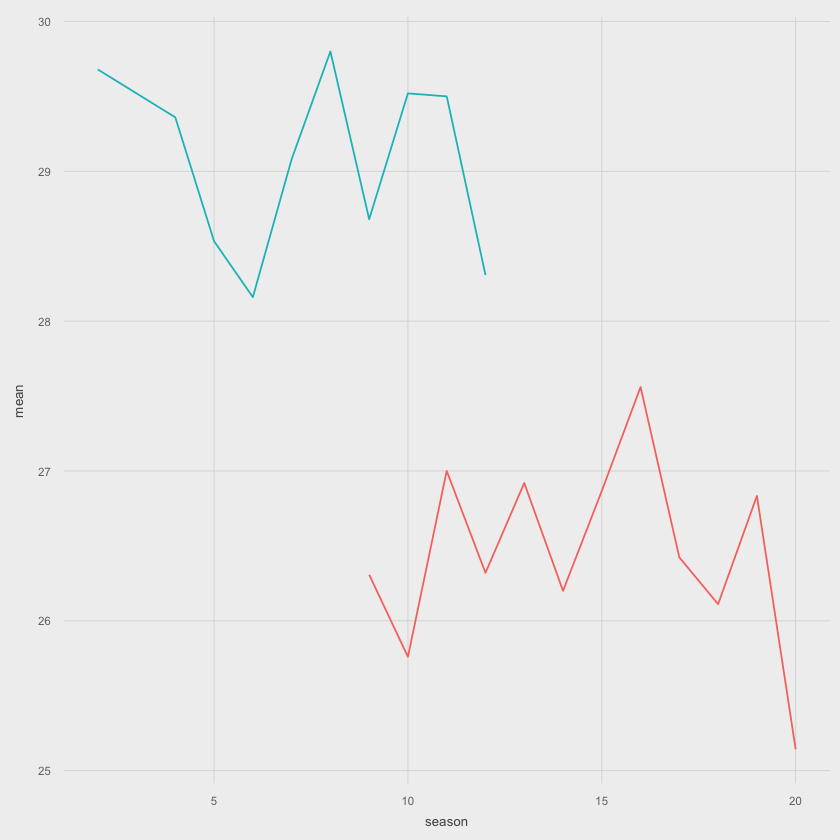

In [132]:
ggplot(all_mean,aes(x = season, y = mean)) + geom_line(aes(colour = factor(show))) + fte_theme()

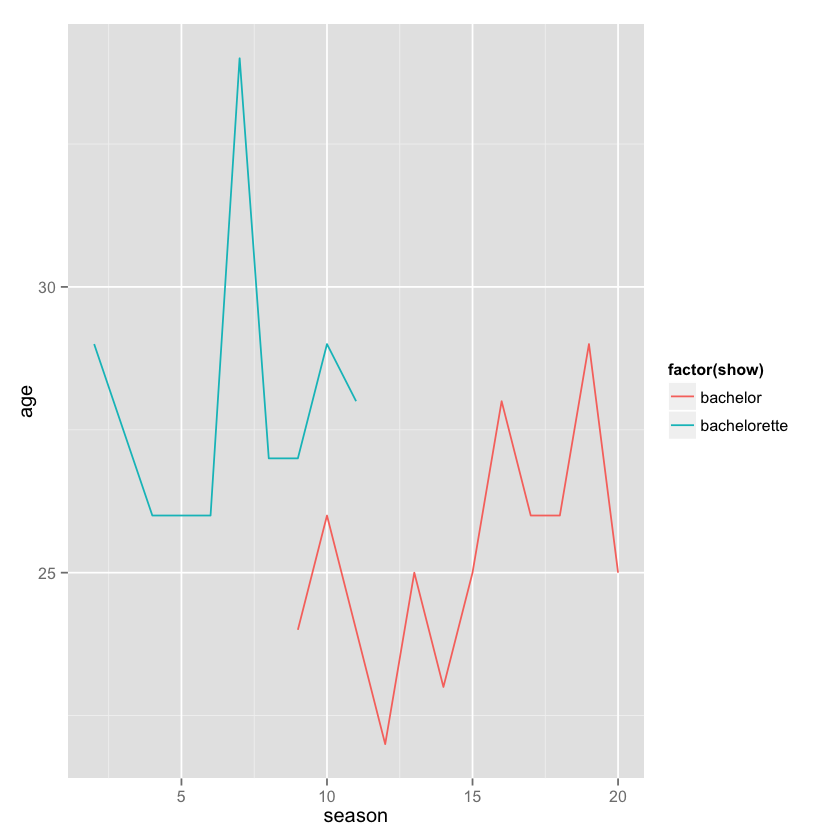

In [91]:
library(dplyr)

all %>% 
  filter(elimination == 'Winner') %>%
  ggplot(aes(x = season, y = age, colour = factor(show))) + geom_line()


In [98]:
library(dplyr)

mean_all <-
na.omit(all) %>% 
  group_by(season, show) %>%
  summarise(mean=mean(age), sd=sd(age))

winners <-
all %>%
  filter(elimination == 'Winner')
  

In [104]:
total <- merge(winners,mean_all, by = c('season','show'))

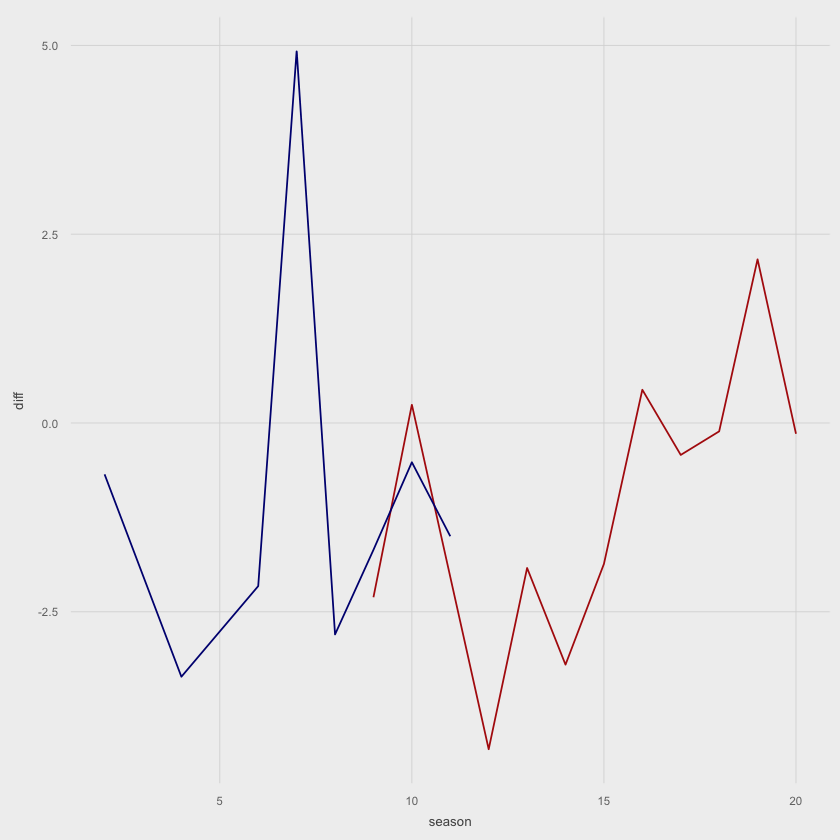

In [129]:
# age difference of winner from the mean age that season

total %>%
  mutate(diff = age - mean) %>%
  ggplot(aes(x = season, y = diff, colour = factor(show))) + geom_line() + 
  scale_colour_manual(values = c("#b21c0e", "navy")) + fte_theme()